### **1. Importing libraries**

In [4]:
import yfinance as yf
import numpy as np
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-darkgrid')
import seaborn as sns
from datetime import date

In [10]:
import requests
import pandas as pd

# Define your API key and the stock symbol
api_key = "WSIBLHJ2DMO2ZX03"
symbol = "NVDA"

# Define the API endpoint for annual revenue data
endpoint = f"https://www.alphavantage.co/query?function=INCOME_STATEMENT&symbol={symbol}&apikey={api_key}"

# Make a GET request to the API
response = requests.get(endpoint)

# Check if the request was successful
if response.status_code == 200:
    # Parse the JSON response
    data = response.json()

    # Convert data to a pandas DataFrame
    df = pd.DataFrame(data["annualReports"])
    #df = pd.DataFrame(index= df['fiscalDateEnding'])

    # Print the revenue data
    #print(df)
else:
    print("Failed to retrieve data. Status code:", response.status_code)
    
df

,fiscalDateEnding,reportedCurrency,grossProfit,totalRevenue,costOfRevenue,costofGoodsAndServicesSold,operatingIncome,sellingGeneralAndAdministrative,researchAndDevelopment,operatingExpenses,...,depreciation,depreciationAndAmortization,incomeBeforeTax,incomeTaxExpense,interestAndDebtExpense,netIncomeFromContinuingOperations,comprehensiveIncomeNetOfTax,ebit,ebitda,netIncome
0,2023-01-29,USD,15356000000,26974000000,11618000000,1040000000,4224000000,2440000000,7339000000,11132000000,...,844000000,699000000,4181000000,-187000000,262000000,4368000000,4336000000,4443000000,5142000000,4368000000
1,2022-01-30,USD,17475000000,26914000000,9439000000,173000000,10041000000,2166000000,5268000000,7434000000,...,611000000,563000000,9941000000,189000000,236000000,9752000000,9722000000,10177000000,10740000000,9752000000
2,2021-01-31,USD,10396000000,16675000000,6279000000,6279000000,4532000000,1940000000,3924000000,5864000000,...,486000000,1098000000,4409000000,77000000,184000000,4332000000,4350000000,4593000000,5691000000,4332000000
3,2020-01-26,USD,6768000000,10918000000,4150000000,4150000000,2846000000,1093000000,2829000000,3922000000,...,355000000,381000000,2970000000,174000000,52000000,2796000000,2809000000,3022000000,3403000000,2796000000
4,2019-01-27,USD,7171000000,11658000000,5798000000,4545000000,3804000000,991000000,2376000000,3367000000,...,233000000,262000000,3896000000,-245000000,58000000,4141000000,4147000000,3954000000,4216000000,4141000000


In [17]:
df.dtypes

fiscalDateEnding                     object
reportedCurrency                     object
grossProfit                          object
totalRevenue                         object
costOfRevenue                        object
costofGoodsAndServicesSold           object
operatingIncome                      object
sellingGeneralAndAdministrative      object
researchAndDevelopment               object
operatingExpenses                    object
investmentIncomeNet                  object
netInterestIncome                    object
interestIncome                       object
interestExpense                      object
nonInterestIncome                    object
otherNonOperatingIncome              object
depreciation                         object
depreciationAndAmortization          object
incomeBeforeTax                      object
incomeTaxExpense                     object
interestAndDebtExpense               object
netIncomeFromContinuingOperations    object
comprehensiveIncomeNetOfTax     

In [13]:
df.set_index('fiscalDateEnding')
df

,fiscalDateEnding,reportedCurrency,grossProfit,totalRevenue,costOfRevenue,costofGoodsAndServicesSold,operatingIncome,sellingGeneralAndAdministrative,researchAndDevelopment,operatingExpenses,...,depreciation,depreciationAndAmortization,incomeBeforeTax,incomeTaxExpense,interestAndDebtExpense,netIncomeFromContinuingOperations,comprehensiveIncomeNetOfTax,ebit,ebitda,netIncome
0,2023-01-29,USD,15356000000,26974000000,11618000000,1040000000,4224000000,2440000000,7339000000,11132000000,...,844000000,699000000,4181000000,-187000000,262000000,4368000000,4336000000,4443000000,5142000000,4368000000
1,2022-01-30,USD,17475000000,26914000000,9439000000,173000000,10041000000,2166000000,5268000000,7434000000,...,611000000,563000000,9941000000,189000000,236000000,9752000000,9722000000,10177000000,10740000000,9752000000
2,2021-01-31,USD,10396000000,16675000000,6279000000,6279000000,4532000000,1940000000,3924000000,5864000000,...,486000000,1098000000,4409000000,77000000,184000000,4332000000,4350000000,4593000000,5691000000,4332000000
3,2020-01-26,USD,6768000000,10918000000,4150000000,4150000000,2846000000,1093000000,2829000000,3922000000,...,355000000,381000000,2970000000,174000000,52000000,2796000000,2809000000,3022000000,3403000000,2796000000
4,2019-01-27,USD,7171000000,11658000000,5798000000,4545000000,3804000000,991000000,2376000000,3367000000,...,233000000,262000000,3896000000,-245000000,58000000,4141000000,4147000000,3954000000,4216000000,4141000000


In [7]:
# Define the data types for the two columns you want to exclude
dtype_exceptions = {'fiscalDateEnding': object, 'reportedCurrency': object}

# Change the data type of all columns except the two specified in 'dtype_exceptions'
for col in df.columns:
    if col not in dtype_exceptions:
        df[col] = df[col].fillna(0).astype(float)  # Change the data type to the desired type

# Print the DataFrame
print(df.dtypes)

ValueError: could not convert string to float: 'None'

In [ ]:
df = revenue_df.astype(int)
df['Date'] = df['fiscalDateEnding'].dt.strftime('%Y/%m/%d')
df = df.astype({"reportedCurrency": str})
df

In [ ]:
revenue_df.columns

In [ ]:
revenue_df.dtypes

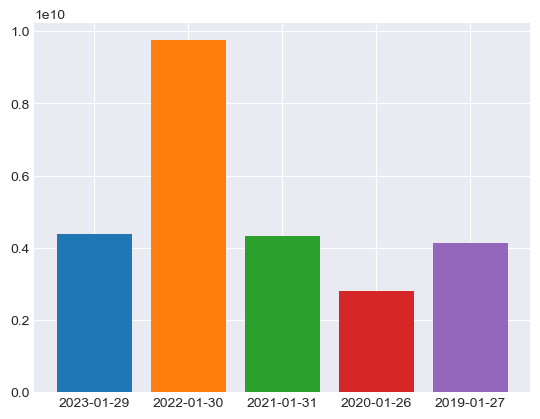

In [16]:
for i in range(len(df)):
    plt.bar(df['fiscalDateEnding'][i], int(df['netIncome'][i]))

### **2. Loading the data and Pre-processing**

In [ ]:
# Stock data extraction from YahooFinance API. (Note: to calculate stock betas, we added FTSE 100 index to the dataset as well.)
#tickers = companies_info['Ticker'].tolist()
#tickers = ['ASML', 'NVDA', 'AVGO', 'TSLA', 'FSLR', 'AMD', 'META', 'AMZN', 'V', 'AAPL', 'BABA', 'PYPL', 'GOOGL', 'ULTA']
tickers = ['ASML', 'NVDA', 'AVGO', 'TSLA', 'AMD', 'META', 'AMZN', 'AAPL', 'BABA', 'GOOGL']
prices = yf.download(tickers, start="2018-10-31", end= date.today())["Close"]

#market_price = yf.download('^FTSE', start="2022-10-31", end="2023-10-01")["Close"]
market_price = yf.download('SPY', start="2018-10-31", end=date.today())["Close"]
prices = pd.concat([market_price,prices,], axis=1)

# Converting datetime format
prices.reset_index(inplace=True)
prices['Date'] = prices['Date'].dt.strftime('%Y/%m/%d')
prices['Date'] = pd.to_datetime(prices['Date'])
prices.set_index('Date', inplace=True)

In [ ]:
# Renaming columns
#prices.columns = ['FTSE 100'] + prices.columns.tolist()[1:]
prices.columns = ['SPY'] + prices.columns.tolist()[1:]
#prices.columns = companies_info['Company'].to_list() + prices.columns.tolist()[:1]
prices.columns = tickers + prices.columns.tolist()[:1]

# Filling missing values with interpolation
prices = prices.interpolate(method="nearest")
prices.tail().round(1)

# Exporting prices to csv
prices.to_csv('TopTechCompanies_Prices.csv')

prices

In [ ]:
# Calculating simple price returns
returns = prices.pct_change().dropna()

# Splitting returns
stock_returns = returns.iloc[:,:-1]
market_returns = pd.Series(returns['SPY'])

### **3. Descriptive analysis of simple and cumulative returns**

#### Daily returns

In [ ]:
# Descriptive statistics of daily returns
import scipy.stats as stats
summary = round(stock_returns.describe().T, 4)
summary['Skew'] = stats.skew(stock_returns._get_numeric_data()).round(4)
summary['Kurt'] = stats.kurtosis(stock_returns._get_numeric_data()).round(4)
summary = summary.drop('count', axis=1)
summary

- Shell, AstraZeneca, HSBC Holdings, Diageo, Rio Tinto Group and GlaxoSmithKline have a negatively skewed distribution, i.e, their returns are more concentrated on the right tail of the distribution, whose tail is longer on the left side. Its investors should expect frequent small gains and some large losses.
- All stocks feature heavy tails (or that their distribution is leptokurtic), with some of them having a kurtosis greater than 10. Consequently, these stocks will experience more frequent extreme returns (large outliers).

In [ ]:
# Line plot function
def line_plot(data,legend_loc, legend_ncol, title, ylabel):
    plt.figure(figsize=(15,5))
    for col in data:
        plt.plot(data.index, data[col], marker='', linewidth=1, label=col)
        plt.legend(loc=legend_loc, ncol=legend_ncol)
        plt.margins(x=0)
        plt.title(title, weight='bold')
        plt.ylabel(ylabel)
    plt.show()

# Plotting daily returns
line_plot(data=stock_returns, legend_loc='upper right', legend_ncol=2, 
            title='Daily Returns', ylabel='Return')

In [ ]:
# Daily Returns distribution
fig = plt.figure(figsize=(10,5))
sns.kdeplot(data=stock_returns,fill=True)
plt.title('Daily Returns Distribution', weight='bold')

We can notice the wider distributions for Diageo and British American Tobacco, meaning these companies have higher volatility associated.

In [ ]:
# Minimum and maximum returns dates
ret_min_max_dates = pd.DataFrame({'Min Return': stock_returns.idxmin(),
'Max Return': stock_returns.idxmax()})
ret_min_max_dates

It appears that most of these stocks had their lowest and highest returns in early 2020, close to the Covid-19 pandemic, which demonstrates the high volatility and financial contagion associated with that period.

In [ ]:
# Box Plot of daily returns by year
returns_by_year = pd.melt(stock_returns.reset_index(),id_vars='Date')
returns_by_year['Year'] = pd.DatetimeIndex(returns_by_year['Date']).year
returns_by_year
ax = sns.boxplot(data = returns_by_year, x='Year',y='value')
ax.set_title('Box Plot of daily returns by year', weight='bold')
ax.set_ylabel(''), ax.set_xlabel('')
for item in ax.get_xticklabels():
    item.set_rotation(90)

We can also observe the high volatility in the pandemic first year through this box plot of all returns grouped by year. There is a greater dispersion of data at 2020.

In [ ]:
# Risk-Return profile
ret_stats = stock_returns.agg(['mean','std']).T
ret_stats.columns=['Return','Risk']
ret_stats['Return'] = ret_stats['Return']*252
ret_stats['Risk'] = ret_stats['Risk']*np.sqrt(252)
ret_stats['Sharpe_Ratio']=(ret_stats['Return']-0.03510)/ret_stats['Risk'] # rf: US 10y Bond Yield at January 31,2023
ret_stats = ret_stats.sort_values('Sharpe_Ratio', ascending=False)
ret_stats.round(3)

The Sharpe Ratio is understood as the stock (or portfolio) excess return divided by standard deviation of returns.
- AstraZeneca has the highest Sharpe ratio: the investiment provides 0.45 units of return for each unit of risk;
- HSBC Holdings and Rio Tinto have negative Sharpe ratios, i.e., both didn't rent more than treasury bills over period, so they may not be worth it for investors who wish to maximize their portfolio ajusted returns.

In [ ]:
# Plotting annualized Risk, Return and Sharpe Ratio
from adjustText import adjust_text
fig = plt.figure(figsize=(10,5))
plt.scatter(data=ret_stats,x='Risk',y='Return', c='Sharpe_Ratio', cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
texts = []
for x, y, s in zip(ret_stats['Risk'],ret_stats['Return'], ret_stats.index):
    texts.append(plt.text(x,y,s))
adjust_text(texts)
plt.xlabel('Annualized Risk'), plt.ylabel('Annualized Return')
plt.title('Risk-Return profile', weight='bold')

In [ ]:
# Measuring stock volatility through Beta
betas = []
for i in range(len(stock_returns.columns)):
    beta = np.polyfit(market_returns, stock_returns.iloc[:,i],1)[0]
    betas.append(beta)
betas = pd.DataFrame(betas, columns=['Beta'], index=tickers)
#betas = pd.DataFrame(betas, columns=['Beta'], index=companies_info['Company'])
betas = betas.sort_values('Beta',ascending=False)
betas.round(3)

Beta coefficient measures the volatility of a security (or portfolio) compared to the systematic risk of the entire market, so it describes how security's returns responds to swings on the market;
- Since all stocks have beta less than one, we can say that they all have lower volatility than the market, that is, the inclusion of each one of them in a portfolio makes it less risky than the same portfolio without that stock.

#### Cumulative daily returns

In [ ]:
# Calculation of cumulative returns, as the growth of £1 
cum_returns = ((1 + stock_returns).cumprod()-1)*100

# Rates of change for each company share
ticker_change = cum_returns.tail(1).round(3)
ticker_change

- AstraZeneca and BP clearly stand out as the stocks with the highest growth, being the only ones with a rate of change greather than 100%.
- On the other hand, Rio Tinto Group stock increased even less than 1%.

In [ ]:
# Plotting daily cummulative returns
line_plot(data=cum_returns, legend_loc='upper left', legend_ncol=1,
            title='Daily Cummulative Returns', ylabel='Cummulative Return')

- Cumulative returns declined during the Covid-19 shock. Particularly, Shell had a big drop to negative values, as a result of the sudden drop in the oil demand following the implementation of restrictions.
- AstraZeneca kept a growth trend throughout the entire period.

#### Correlation and Covariance matrices

In [ ]:
# Correlation Heatmap
import seaborn as sns
plt.figure(figsize=(15,5))
mask = np.triu(np.ones_like(stock_returns.corr(), dtype=bool))
my_cmap = sns.diverging_palette(10, 220, sep=80, n=50)
sns.heatmap(stock_returns.corr(), mask=mask, annot=True, fmt=".02f", cmap='inferno')
plt.title('Correlation Heatmap', weight='bold')

- We can see that Shell is highly correlated with the remaining stocks, which may be due to its importance in the market, being the most highly-valued british company;
- On the othe hand, the second largest british company - AstraZeneca - appears to be the least correlated with the market.

In [ ]:
# Annual Covariance matrix
cov_matrix = stock_returns.cov(numeric_only=True)*252
cov_matrix.round(4)

### **2. Portfolio optimization**

#### 2.1 GMV and MSR Portfolios

##### Portfolio Optimization via Monte Carlo Method

In [ ]:
mean_ret = stock_returns.mean()*252
std_returns = stock_returns.std()*np.sqrt(252)

assets_num=len(tickers)
port_num=50000
port_ret=[]
port_vol=[]
port_weights=[]
sharpe_ratio=[]

for portfolio in range(port_num):
    weights = np.random.random(assets_num)
    weights /= np.sum(weights)
    ret = np.dot(weights, mean_ret)
    vol = np.sqrt(np.dot(weights.T, np.dot(cov_matrix,weights)))
    rf = 0.03510 # US 10y Bond Yield at January 31,2023
    sharpe = (ret-rf)/vol
    sharpe_ratio.append(sharpe)
    port_ret.append(ret)
    port_vol.append(vol)
    port_weights.append(weights)

# a dictionary for Returns and Risk values of each portfolio
port_dict = {'Returns': port_ret,
             'Volatility': port_vol,
             'Sharpe Ratio': sharpe_ratio}

for counter,symbol in enumerate(tickers):
    port_dict[symbol] = [Weight[counter] for Weight in port_weights]

port_EF = pd.DataFrame(port_dict)

gmv_port_value = port_EF['Volatility'].min()
msr_port_value = port_EF['Sharpe Ratio'].max()

gmv_port = port_EF.loc[port_EF['Volatility'] == gmv_port_value]
msr_port = port_EF.loc[port_EF['Sharpe Ratio'] == msr_port_value]

port_EF.plot.scatter(x='Volatility', y='Returns', c='Sharpe Ratio',
                cmap='viridis', edgecolors='black', figsize=(10, 8), grid=True)
plt.xlabel('Volatility (Standard Deviation)')
plt.ylabel('Expected Returns')
plt.title('Portfolio Optimization: Efficient Frontier', weight='bold')
plt.scatter(x=gmv_port['Volatility'], y=gmv_port['Returns'], c='yellow', marker='*', s=500, label='Global Minimum Variance')
plt.scatter(x=msr_port['Volatility'], y=msr_port['Returns'], c='red', marker='*', s=500, label='Maximum Sharpe Ratio')
plt.legend(labelspacing=1.2)
plt.grid(True)
plt.show()

In [ ]:
# Global Minimum Variance Portfolio (GMV) 
gmv_port.round(3)

In [ ]:
# Maximum Sharpe Ratio Portfolio (MSR)
msr_port.round(3)

##### Using PyPortfolioOpt library for optimization

In [ ]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

rf = 0.03510 # US 10y Bond Yield at January 31,2023
stock_prices = prices.iloc[:,:-1]
mu = expected_returns.mean_historical_return(stock_prices)
S = risk_models.sample_cov(stock_prices)
ef = EfficientFrontier(mu, S, weight_bounds=(0, 1)) # Weights between 0 and 1, ie, no short-selling

# Maximun Sharpe Ratio (MSR) Portfolio
opt_msr = ef.max_sharpe(risk_free_rate=rf)
weights_msr = ef.clean_weights()
print('-----------------------------')
print("\033[1m" + "Portfolio Performance:")
print('-----------------------------')
print('Max Sharpe Portfolio:\n')
print(ef.portfolio_performance(verbose=True, risk_free_rate = rf)[:-3])

print('\nGlobal Min Variance Portfolio:\n')
ef = EfficientFrontier(mu, S, weight_bounds=(0, 1)) # Weights between 0 and 1, ie, no short-selling
opt_gmv = ef.min_volatility()
weights_gmv = ef.clean_weights()
print(ef.portfolio_performance(verbose=True, risk_free_rate = rf)[:-3])

#### 2.2 Equally-Weighted Portfolio
Each stock counts equally toward the portfolio value.

In [ ]:
numstocks = 10
weights_ew = np.repeat(1/numstocks,numstocks)
ew_df= pd.DataFrame(weights_ew, index=ret_stats.index, columns=['EW'])

In [ ]:
import yfinance as yf

#tickers = ['AAPL', 'MSFT', 'GOOGL']  # Example list of tickers, replace with your own

market_cap=[]
for ticker in tickers:
    print(f'Ticker: {ticker}')
    stock = yf.Ticker(ticker)
    market_cap_value = int(stock.info['marketCap'])
    market_cap.append(market_cap_value)
    
print(market_cap)

#### 2.3 Market Cap-Weighted Portfolio
In this portfolio, the weighting of each stock is determined by its total market capitalization.

In [ ]:
mcap = np.array(market_cap)
mcap_weights = mcap/sum(mcap)
mcap_df= pd.DataFrame(mcap_weights, index=ret_stats.index, columns=['MCAP'])

### **3. Analysis of optimized Portfolios' Performance**
In this section we will be focused on the last four portfolios generated:
- Equally-Weighted, Market-Cap Weighted, Minimum Variance and Tangency Portfolio (Maximum Sharpe Ratio)

In [ ]:
# Portolio weights
gmv_df = pd.DataFrame.from_dict(weights_gmv, orient='index')
gmv_df.columns = ['GMV']

msr_df = pd.DataFrame.from_dict(weights_msr, orient='index')
msr_df.columns = ['MSR']

weights_df = pd.concat([ew_df, mcap_df, gmv_df, msr_df],axis=1)

fig = plt.figure(figsize=(20,10))
colours = dict(zip(weights_df.index, plt.cm.tab10.colors[:len(weights_df.index)]))
for column,num in zip(weights_df.columns, range(len(weights_df.columns))):
    plt.subplot(1,4,num+1)
    labels, values = zip(*((key,value) for key,value in weights_df[column].items() if value>0))
    plt.pie(values, labels=labels, colors=[colours[key] for key in labels], autopct='%1.1f%%')
    plt.title('{} Portfolio'.format(column), weight='bold')
    fig.tight_layout()
plt.show()

In [ ]:
# Calculating portfolio returns
stock_returns = pd.concat([stock_returns,stock_returns.dot(weights_df)], axis=1)
portfolio_returns = stock_returns.iloc[:,-4:]

In [ ]:
# Volatility Analysis
# Box plot are applied to visualize the returns dispersion of each portfolio
portfolio_returns.plot(kind='box', ylabel="Returns")
plt.title("Box Plot of Daily Returns", weight='bold')

As expected, the returns of minimum variance portfolio are less dispersed than the other ones, having a lower interquartile range.

In [ ]:
# Comparing cumulative returns of individual assets and optimized portfolios
cum_returns = ((1 + stock_returns).cumprod() - 1)*100

fig = plt.figure(figsize=(15,5))
colors=['r', 'g', 'b']
for x in cum_returns:
        if x in cum_returns.columns[:-4]:
                plt.plot(cum_returns.index, cum_returns[x], marker='',
                linewidth=1, alpha=0.7, label=x)
        else:
                plt.plot(cum_returns.index, cum_returns[x], marker='',
                        linewidth=4, alpha=1, label=x)
plt.title('Daily Cumulative Returns', weight='bold')
plt.legend(loc='upper left', ncol=2)
plt.margins(x=0)
plt.show()

In [ ]:
# Annualized Sharpe Ratios
sharpe = (stock_returns.mean()*252-rf) / (stock_returns.std()*np.sqrt(252))
sharpe = sharpe.sort_values(ascending=False)

palette = ['red' if (x=='MSR' or x=='GMV' or x=='MCAP' or x=='EW') else 'grey' for x in sharpe.index]
ax = sns.barplot(x=sharpe.index, y=sharpe.values, palette=palette)
plt.xticks(rotation=70)
ax.bar_label(ax.containers[0], fmt='%.2f')
plt.title('Annualized Sharpe Ratios', weight='bold')

#### Rolling statistics

In [ ]:
# Portfolios' volatility over time
port_vol = portfolio_returns.rolling(60).std().dropna()*np.sqrt(252) # 30-day rolling window
port_vol = port_vol.dropna()

# Plotting rolling annualized standard deviation
line_plot(data=port_vol, legend_loc='upper left', legend_ncol=1,
            title='Rolling Annualized Standard Deviation, 60-day window',
            ylabel='Standard Deviation')

In [ ]:
# Rolling betas
covariance = portfolio_returns.rolling(60).cov(market_returns)
variance = portfolio_returns.rolling(60).var()
rolling_beta = covariance.div(variance)
rolling_beta = rolling_beta.dropna()

# Plotting portfolio Betas
line_plot(data=rolling_beta, legend_loc='lower center', legend_ncol=4,
            title='Rolling Betas, 60-day window', ylabel='Beta')

According to the graph, the maximum sharpe ratio portfolio seems to be less sensitive to the market, at least before 2020.

In [ ]:
# Exponentially Weighted Average
ewa = portfolio_returns.ewm(halflife=60).mean()

line_plot(data=ewa, legend_loc='lower center', legend_ncol=4,
            title='Exponentially Weighted Average, 60-day Half-Life',
            ylabel='EWA')

In [ ]:
# Annualized Rolling Sharpe Ratio (12 month window)
rolling_sr = portfolio_returns.rolling(252).apply(lambda x: ((x.mean()*252)-rf)/(x.std()*np.sqrt(252)), raw=True)
rolling_sr = rolling_sr.dropna()

plt.figure(figsize=(15,5))
line_plot(data=rolling_sr, legend_loc='lower center', legend_ncol=4,
            title='Annualised Rolling Sharpe Ratio (12-month period)',
            ylabel='Sharpe Ratio')

- The rolling estimate provides us with more information than single point estimate for the entire period, allowing to infer whether the risk-adjusted returns are consistent over time or it fluctuates significantly. 
- As we can see, the SR are volatile which maymay indicate that the portfolios may be riskier at certain time points, namely before 2016 and during Covid-19 crisis, or that it does not perform as well at these time points.

#### **4. Tail Risk Analysis**
Tail risk include low-probability events arising at both ends of a normal distribution curve, also known as tail events.

##### **4.1 Historical Drawdown**

In [ ]:
# Historical drawdown
running_max = np.maximum.accumulate(cum_returns[['GMV','MSR','MCAP','EW']])
drawdown = (cum_returns[['GMV','MSR','MCAP','EW']])/running_max - 1
drawdown[drawdown > 0] = 0 # because we only care about losses

line_plot(data=drawdown, legend_loc='lower center', legend_ncol=4,
            title='Historical Drawdown',
            ylabel='Drawdown')

- A drawdown is an important risk factor and it refers to the the measure of the decline in vale of an investment from a relative peak value to a relative through.
- Equally-weighted portfolio (EW) had slightly stronger drawdowns over the period, namely 155% and 86%, at the end of 2015 and at the beginning of 2020, respectively.

##### **4.2 Value at Risk (VaR) and Conditional Value at Risk (CVaR)**

In this section, we will address statistics for measuring economic losses and controlling exposure to Market Risk:
- **Value at Risk (VaR)** uses the past observed distribution of portfolios returns to estimate the maximum amount of potential future losses that could happen in a portfolio, for a given likelihood level.
- While VaR represents a worst-case loss associated with a probability and a time horizon, **CVaR (also called Expected Shortfall)** is the expected loss if that worst-case threshold is ever crossed, so it accounts for expected losses that occur beyond the VaR breakpoint.

##### **Historical (Non-Parametric) Method**
 - In this simple and fast method we calculate VaR and CVaR directly from past returns. There is no hypothesis about the distribution of the data, as it is based on the reorganization of real historical returns, classifying them from worst to best.

In [ ]:
portfolios = portfolio_returns.columns
fig = plt.figure(figsize=(20,5))
var_H_port = []
cvar_H_port = []
for portfolio,num in zip(portfolios,range(4)):
    portfolio_ret = portfolio_returns[portfolio]
    # Sorting the returns for plotting
    portfolio_ret = portfolio_ret.sort_values()
    plt.subplot(1,4,num+1)
    # Plot the probability of each return quantile
    plt.hist(portfolio_ret, density=True)
    # HS VaR and CVaR 90,95,99
    var_levels = [90,95]
    colors = ['r','g']
    for var_level,color in zip(var_levels,colors):
        var_H = np.percentile(portfolio_ret, 100-var_level)
        plt.axvline(x=var_H, color=color, linestyle="-", label=f'VaR {var_level}: {-var_H*100:.2f}%')
        cvar_H = portfolio_ret[portfolio_ret <= var_H].mean()
        cvar_H_port.append(cvar_H)
        plt.axvline(x=cvar_H, color=color, linestyle=":", label=f'CVaR {var_level}: {-cvar_H*100:.2f}%')
        plt.title(f'{portfolio}')
        plt.legend(loc='upper right',frameon=False)
    plt.suptitle('Distribution of Daily Returns', weight='bold')
    fig.supylabel('Probability'), fig.supxlabel('Return (%)')
    plt.tight_layout(rect=(0.025,0,1,1))
    # Calculating maximum historical daily loss
    var_H = np.percentile(portfolio_ret, 100-95)
    cvar_95_H_min = portfolio_ret[portfolio_ret <= var_H].min()
    print(f'Max historical daily loss (95) - {portfolio}: {-cvar_95_H_min*100:.2f}%')

- VaR (95) of GMV portoflio indicates that we can be 95% certain that losses will not exceed 1.43% in a given day. What about the losses that exceed this amount? CVaR (95) tells us that in the worst 5% cases, GMV portfolio daily losses will be on average 2.22%, with a maximum value of 9.78%.
- Interestingly, the maximum historical loss of the minimum variance portfolio is greater than that of the tangency portfolio.


##### **VaR over n-day time period**
 We can calculate the VaR over a longer time window as well. For that, just take our 1 day VaR estimate and multiply it by the square root of the desired time period.

In [ ]:
# Aggregate forecasted VaR
forecasted_val = np.empty([252, 2]) 

# Loop through each forecast period
data=[]
for portfolio in portfolios:
    forecasted_val = np.empty([252, 2])
    portfolio_ret = portfolio_returns[portfolio]
    portfolio_ret = portfolio_ret.sort_values()
    for i in range(0,252):
        # Save the time horizon i
        forecasted_val[i, 0] = i
        # Save the forecasted VaR 95
        forecasted_val[i, 1] = np.percentile(portfolio_ret, 100-95) * np.sqrt(i+1)
    # Data for plotting
    x = forecasted_val[:,0]
    y = forecasted_val[:,1]*(-100)
    plt.plot(x,y, label=portfolio)
plt.title('VaR (95) scaled by time', weight='bold')
plt.ylabel('Forecasted VaR 95 (%)'), plt.xlabel('Trading days')
plt.legend(loc=0, frameon=False)
plt.show()

##### **Parametric (Variance-Covariance) Method**
This approach assumes a normal distribution of returns, meaning we only need to estimate two factors - the expected return and the standard deviation - which allows us to plot a normal distribution curve.

In [ ]:
from scipy.stats import norm
# Normal distribution assumption
def parametric_var(portfolio,alpha):
    portfolio_ret = portfolio_returns[portfolio]
    mu = np.mean(portfolio_ret)
    std = np.std(portfolio_ret)
    return mu - norm.ppf(alpha)*std

def parametric_cvar(portfolio,alpha):
    portfolio_ret = portfolio_returns[portfolio]
    mu = np.mean(portfolio_ret)
    std = np.std(portfolio_ret)
    return mu + alpha**-1 * norm.pdf(norm.ppf(alpha))*std

var_p_table = pd.DataFrame()
for portfolio in portfolios:
    var_p = parametric_var(portfolio,0.05)
    cvar_p = parametric_cvar(portfolio,0.05)
    var_p_table_temp = pd.DataFrame({'Parametric VaR (95)':var_p,'Parametric CVaR (95)':cvar_p}, 
                                    index=[portfolio])
    for col in var_p_table_temp[-2:]:
        var_p_table_temp[col] = var_p_table_temp[col].apply(lambda x: "{:.2f}%".format(x*100))
    var_p_table = pd.concat((var_p_table,var_p_table_temp))
var_p_table

##### **Monte Carlo Method**
Monte Carlo Simulation is similar to Historical Simulation in that it estimates VaR by simulating risk factor scenarios and revaluing all positions in a portfolio for each trial. Nevertheless, it generates the risk factor scenarios through the lognormal distribution,instead of creating them from a historical distribution.

This way, both models share the same distribution assumption for risk factors, but the approach for generating the price distribution of the asset isn't the same. We estimate value at risk by calculating the change in value for each scenario and looking at the worst losses.

In [ ]:
trading_days = 252 # forecast period
S0 = 10000 # initial portfolio value
simulations_number = 1500 # number of simulations
sim_returns = []
fig_0 = plt.figure(0,figsize=(25,5))
fig_1 = plt.figure(1,figsize=(25,5))
colors = ['r','g']
var_levels = [90,95]
for portfolio,num in zip(portfolios,range(4)):
    portfolio_ret = portfolio_returns[portfolio]
    mu = np.mean(portfolio_ret)
    std = np.std(portfolio_ret)
    # Loop through 100 simulations
    plt.figure(0)
    for i in range(simulations_number):
        random_rets = np.random.normal(mu, std, trading_days)   
        forecasted_values = S0*(random_rets+1).cumprod()-1
        sim_returns.append(random_rets)
        # Show the simulations
        plt.subplot(1,4,num+1)
        plt.plot(range(trading_days), forecasted_values)
        plt.title(f'{portfolio}')
    plt.suptitle('1500 Portfolio Simulations', weight='bold')
    fig_0.supylabel('Portfolio Value (£)'), fig_0.supxlabel('Days')
    plt.tight_layout(rect=(0.025,0,1,1))
    # Returns distribution
    plt.figure(1)
    plt.subplot(1,4,num+1)
    plt.hist(portfolio_ret, density=True)
    for var_level,color in zip(var_levels,colors):
        var_mc = np.percentile(sim_returns, 100-var_level)
        cvar_mc = np.array(sim_returns)[np.array(sim_returns) <= var_mc].mean()
        plt.axvline(x=var_mc, color=color, linestyle="-", 
                    label=f'VaR {var_level}: {-var_mc*100:.2f}%')
        plt.axvline(x=cvar_mc, color=color, linestyle=":",
                    label=f'CVaR {var_level}: {-cvar_mc*100:.2f}%')
        plt.title(f'{portfolio}')
        plt.legend(loc='upper right',frameon=False)
    plt.suptitle('Distribution of Daily Returns', weight='bold')
    fig_1.supylabel('Probability'), fig_1.supxlabel('Return (%)')
    plt.tight_layout(rect=(0.025,0,1,1))

##### **Expected losses of our investment portfolio**
95% Value at Risk of £10,000 investment in each portfolio over different time frames

In [ ]:
from scipy.stats import norm
def var(method,portfolio, investment, time_frame, confidence_level):
    # time horizon of VaR
    if time_frame == 'day':
        days = 1
    elif time_frame == 'month':
        days = 21
    elif time_frame == 'quarter':
        days = 63
    elif time_frame == 'year':
        days = 252
    else:
        raise ValueError ('time_frame input invalid.')
    
    portfolio_ret = portfolio_returns[portfolio]
    mu = np.mean(portfolio_ret)
    std = np.std(portfolio_ret)

    # Var estimation method
    if method=='parametric':
        alpha = (100-confidence_level)/100
        var = investment*(mu-norm.ppf(alpha)*std)*np.sqrt(days)
        return var
    elif method=='historical':
        portfolio_ret = portfolio_ret.sort_values()
        var = investment*(-np.percentile(portfolio_ret, 100-confidence_level)*np.sqrt(days))
        return var
    elif method=='monte carlo':
        for i in range(1500):
            random_rets = np.random.normal(mu, std, 252)
            forecasted_values = 10*(random_rets+1).cumprod()-1
            sim_returns.append(random_rets)
        var = investment*(-np.percentile(sim_returns, 100-confidence_level)*np.sqrt(days))
        return var
    else:
        raise ValueError ('method input invalid')

var_table = pd.DataFrame()
methods = ['historical','parametric','monte carlo']
for method in methods:
    for portfolio in portfolios:
        # Portfolio VaR calculation for each time horizon:
        var_p_d = var(method=method, portfolio=portfolio,investment = 10000, time_frame='day',
                    confidence_level=95)
        var_p_m = var(method=method, portfolio=portfolio, investment = 10000, time_frame='month',
                    confidence_level=95)
        var_p_q = var(method=method, portfolio=portfolio, investment = 10000, time_frame='quarter',
                    confidence_level=95)
        var_p_y = var(method=method, portfolio=portfolio, investment = 10000, time_frame='year',
                    confidence_level=95)
        var_table_temp = pd.DataFrame({'Method':method,'Daily':[var_p_d],'Monthly':[var_p_m], 
                                        'Quarterly':[var_p_q], 'Annual':[var_p_y]}, index=[portfolio])
        # Format numbers as currency
        for col in var_table_temp.columns[-4:]:
            var_table_temp[col]= var_table_temp[col].apply(lambda x: "£{:,.1f}".format(x))
        var_table = pd.concat([var_table,var_table_temp])
var_table

- According to historical method, with 95 percent confidence level, our losses from a £10,000 investment in MSR portfolio won't exceed the value of £854.2 in a given month.
- Parametric and Monte Carlo approaches estimate higher VaR than the historical method.
- Unlike the other methods, there's very litle disparity in values when using Monte Carlo Simulation approach.